# Handwritten digits classification using TensorFlow

Putting all the concepts we have learned so far, we will see how can use tensorflow to
build a neural network to recognize handwritten digits. If you are playing around deep
learning off late then you must have come across MNIST dataset. It is being called the hello
world of deep learning. 

It consists of 55,000 data points of handwritten digits (0 to 9).
In this section, we will see how can we use our neural network to recognize the
handwritten digits and also we will get hang of tensorflow and tensorboard.
 

## Import required libraries

As a first step, let us import all the required libraries:

In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime


%matplotlib inline

In [2]:
print(tf.__version__)

2.3.0


## Load the Dataset

In the below code, "data/mnist" implies the location where we store the MNIST dataset.
one_hot=True implies we are one-hot encoding the labels (0 to 9):

In [16]:
#mnist = tf.keras.datasets.mnist

#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

# Any results you write to the current directory are saved as output.


from configs import DATA_DIR, LOG_DIR, VIS_DIR
from utils import mnist_reader
from utils.helper import get_sprite_image

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')


file_writer = tf.summary.create_file_writer(logdir)

labels = ['t_shirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
Y_str = np.array([labels[j] for j in y_test])
np.savetxt('Xtest.tsv', X_test, fmt='%.6e', delimiter='\t')
np.savetxt('Ytest.tsv', Y_str, fmt='%s')


In [41]:
print(len(labels))

10


Let's check what we got in our data:

In [4]:
print("No of images in training set {}".format(X_train.shape))
print("No of labels in training set {}".format(y_train.shape))

print("No of images in test set {}".format(X_test.shape))
print("No of labels in test set {}".format(y_test.shape))

No of images in training set (60000, 784)
No of labels in training set (60000,)
No of images in test set (10000, 784)
No of labels in test set (10000,)


We have 55,000 images in the training set and each image is of size 784 and we have 10 labels which are actually 0 to 9. Similarly, we have 10000 images in the test set.

Now we plot one image to see how it looks like:

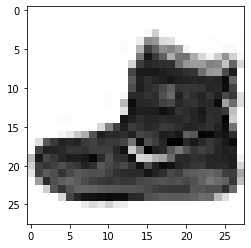

In [5]:
img1 = X_train[0].reshape(28,28)
plt.imshow(img1, cmap='Greys')

## Define the number of neurons in each layer

We build a 4 layer neural network with 3 hidden layers and 1 output layer. As the size of
the input image is 784. We set the num_input to 784 and since we have 10 handwritten
digits (0 to 9), We set 10 neurons in the output layer. We define the number of neurons in
each layer as follows,

In [42]:
#number of neurons in input layer
num_input = 28

#number of neurons in hidden layer 1
num_hidden1 = 1024

#number of neurons in hidden layer 2
num_hidden2 = 512 

#number of neurons in hidden layer 3
num_hidden3 = 256  

#number of neurons in output layer
num_output = len(labels)

#train size
train_size = 50

#kernel_size
kernel_size = 5

#filters
filters = 5

## Defining placeholders

As we learned, we first need to define the placeholders for input and output. Values for
the placeholders will be feed at the run time through feed_dict:

Since we have a 4 layer network, we have 4 weights and 4 baises. We initialize our weights
by drawing values from the truncated normal distribution with a standard deviation of
0.1. 

Remember, the dimensions of the weights matrix should be a number of neurons in the
previous layer x number of neurons in the current layer. For instance, the dimension of
weight matrix w3 should be the number of neurons in the hidden layer 2 x number of
neurons in hidden layer 3.

We often define all the weights in a dictionary as given below:

The dimension of bias should be a number of neurons in the current layer. For instance, the
dimension of bias b2 is the number of neurons in the hidden layer 2. We set the bias value
as constant 0.1 in all layers:



## Forward Propagation

Now, we define the forward propagation operation. We use relu activations in all layers
and in the last layer we use sigmoid activation as defined below:

## Compute Loss and Backpropagate



Next, we define our loss function. We use softmax cross-entropy as our loss
function. Tensorflow
provides tf.nn.softmax_cross_entropy_with_logits() function for computing the
softmax cross entropy loss. It takes the two parameters as inputs logits and labels.

* logits implies the logits predicted by our network. That is, y_hat

* labels imply the actual labels. That is, true labels y


We take mean of the loss using tf.reduce_mean()

In [17]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(num_input, num_input,1)),
  tf.keras.layers.Flatten(input_shape=(num_input, num_input)),
  
  tf.keras.layers.Dense(units=num_hidden1, activation='swish'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(units=num_hidden2, activation='swish'),
  tf.keras.layers.Dense(units=num_hidden3, activation='swish'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=num_output)
])

Now, we need to minimize the loss using backpropagation. Don't worry! We don't have to
calculate derivatives of all the weights manually. Instead, we can use tensorflow's
optimizer. In this section, we use Adam optimizer. It is a variant of gradient descent
optimization technique we learned in the previous chapter. In the next chapter, we will
dive into detail and see how exactly all the Adam and several other optimizers work. For
now, let's say we use Adam optimizer as our backpropagation algorithm,


tf.train.AdamOptimizer() requires the learning rate as input. So we set 1e-4 as the learning rate and we minimize the loss with minimize() function. It computes the gradients and updates the parameters (weights and biases) of our network.

In [2]:
with file_writer.as_default():
  # Don't forget to reshape.
  images = np.reshape(X_train[0:25], (-1, 28, 28, 1))
  tf.summary.image("25 training data examples", images, max_outputs=25, step=0)

%tensorboard --logdir logs/train_data

NameError: name 'file_writer' is not defined

In [ ]:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

training_history = model.fit(
    X_train.reshape(60000,28,28,1), # input
    np.transpose(y_train), # output
    batch_size=train_size,
    verbose=0, # Suppress chatty output; use Tensorboard instead
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback],
)

#model.fit(X_train, y_train, epochs=50)

In [1]:
%tensorboard --logdir logs/scalars

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
predictions = model(X_train[:1]).numpy()
predictions
tf.nn.softmax(predictions).numpy()

##  Compute Accuracy

We calculate the accuracy of our model as follows. 


* y_hat denotes the predicted probability for each class by our model. Since we have 10 classes we will have 10 probabilities. If the probability is high at position 7, then it means that our network predicts the input image as digit 7 with high probability.  tf.argmax() returns the index of the largest value. Thus, tf.argmax(y_hat,1) gives the index where the probability is high. Thus, if the probability is high at index 7, then it returns 7
<br>


* Y denotes the actual labels and it is the one hot encoded values. That is, it consists of zeros everywhere except at the position of the actual image where it consists of 1. For instance, if the input image is 7, then Y has 0 at all indices except at index 7 where it has 1. Thus, tf.argmax(Y,1) returns 7 because that is where we have high value i.e 1. 


Thus, tf.armax(y_hat,1) gives the predicted digit and tf.argmax(Y,1) gives us the actual digit. 

tf.equal(x, y) takes x and y as inputs and returns the truth value of (x == y) element-wise. Thus, correct_pred = tf.equal(predicted_digit,actual_digit) consists of True where the actual and predicted digits are same and False where the actual and predicted digits are not the same. We convert the boolean values in correct_pred into float using tensorflow's cast operation. That is, tf.cast(correct_pred, tf.float32). After converting into float values, take the average using tf.treduce_mean().

Thus, tf.reduce_mean(tf.cast(correct_pred, tf.float32)) gives us the average correct predictions.

In [ ]:
model.evaluate(X_test,  y_test, verbose=2, return_dict)

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

## Create Summary

We can also visualize how the loss and accuracy of our model change during several
iterations in tensorboard. So, we use tf.summary() to get the summary of the variable.
Since the loss and accuracy are scalar variables, we use tf.summary.scalar() to store the summary as shown below:

Next, we merge all the summaries we use in our graph using tf.summary.merge_all(). We merge all summaries because when we have many summaries running and storing them would become inefficient, so we merge all the summaries and run them once in our session instead of running multiple times. 

## Train the Model

Now it is time to train our model. As we learned, first we need to initialize all the variables:

Define the batch size and number of iterations:

Start the tensorflow session and perform training

As you may observe, the loss decreases and the accuracy increases over the training iterations. Now that we have learned how to build the neural network using tensorflow, in the next section we will see how can we visualize the computational graph of our model in tensorboard. 